El siguiente bloque de código realiza las siguientes acciones:

1. Importamos las bibliotecas necesarias: `pandas`, `numpy`, `matplotlib.pyplot`, `ListedColormap`...
2. Configuramos `%matplotlib inline` para que las visualizaciones se muestren en el entorno de Jupyter Notebook.
3. Establecemos el tamaño predeterminado de las figuras de matplotlib en 16x9 pulgadas.
4. Establecemos el estilo de las gráficas en "ggplot".
5. Importamos las clases y funciones necesarias de scikit-learn para el modelado y evaluación de clasificadores.
6. Leemos "homeLoanAproval_modificado.csv" utilizando la función `read_csv` de pandas y lo asignamos a la variable `dataframe`.
7. Mostramos las primeras 10 filas del dataframe utilizando el método `head(10)`.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.metrics import confusion_matrix

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

dataframe = pd.read_csv(r"homeLoanAproval_modificado.csv",sep=',')
dataframe.head(10)

,Loan_ID,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,PropertyArea,LoanStatus
0,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0,141.0,360.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196,267.0,360.0,Urban,Y
5,LP001013,Male,Yes,0,Not Graduate,No,2333,1516,95.0,360.0,Urban,Y
6,LP001018,Male,Yes,2,Graduate,No,4006,1526,168.0,360.0,Urban,Y
7,LP001020,Male,Yes,1,Graduate,No,12841,10968,349.0,360.0,Semiurban,N
8,LP001024,Male,Yes,2,Graduate,No,3200,700,70.0,360.0,Urban,Y
9,LP001028,Male,Yes,2,Graduate,No,3073,8106,200.0,360.0,Urban,Y


Ahora, separamos los datos:

1. Seleccionamos las columnas 'ApplicantIncome', 'Dependents', 'LoanAmount' y 'LoanAmountTerm' del dataframe y lo asignamos a la variable `X`. Estas columnas representan las características (o variables independientes) que se utilizarán para el modelo de clasificación.

2. Asignamos la columna 'LoanStatus' del dataframe a la variable `y`. Esta columna representa la variable objetivo (o variable dependiente) que el modelo intentará predecir.

3. Dividimos el conjunto de datos en conjuntos de entrenamiento y prueba utilizando la función `train_test_split` de scikit-learn. El 75% de los datos se utilizan para el entrenamiento del modelo y el 25% restante se utiliza para probar el modelo. El parámetro `random_state=0` se utiliza para asegurar que la división sea reproducible.

4. Creamos un objeto `MinMaxScaler`. Este objeto se utiliza para escalar las características a un rango específico (por defecto entre 0 y 1). Esto se hace para normalizar los datos y asegurar que ciertas características no influyan desproporcionadamente en el modelo debido a su escala.

5. Ajustamos el escalador a los datos de entrenamiento y luego se transformna los datos de entrenamiento utilizando el escalador ajustado. Esto normaliza los datos de entrenamiento.

6. Transformamos los datos de prueba utilizando el mismo escalador. Es importante utilizar el mismo escalador para los datos de entrenamiento y prueba para asegurar que los datos estén en la misma escala.

In [13]:
X = dataframe[['ApplicantIncome', 'CoapplicantIncome','Dependents', 'LoanAmount','LoanAmountTerm']].values
y = dataframe['LoanStatus'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

1. Establecemos el número de vecinos a 7.

2. Creamos un objeto `KNeighborsClassifier` con 7 vecinos.

3. Ajustamos el clasificador a los datos de entrenamiento. Esto implica almacenar los datos de entrenamiento para que puedan ser utilizados en la clasificación de nuevas instancias.

4. Imprimimos la precisión del clasificador K-NN en el conjunto de entrenamiento. La precisión se calcula como la fracción de instancias de entrenamiento que fueron correctamente clasificadas por el clasificador.

5. Imprimimos la precisión del clasificador K-NN en el conjunto de prueba. La precisión se calcula como la fracción de instancias de prueba que fueron correctamente clasificadas por el clasificador.

In [14]:
n_neighbors = 6

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.78
Accuracy of K-NN classifier on test set: 0.60


1. Utilizamos el modelo K-NN entrenado para predecir las etiquetas de los datos de prueba (`X_test`). Las predicciones las almacenanamos en la variable `pred`.

2. Imprimimos la matriz de confusión de las predicciones.

3. Imprimimos un informe de clasificación.

In [15]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 8 32]
 [16 64]]
              precision    recall  f1-score   support

           N       0.33      0.20      0.25        40
           Y       0.67      0.80      0.73        80

    accuracy                           0.60       120
   macro avg       0.50      0.50      0.49       120
weighted avg       0.56      0.60      0.57       120



Este informe de clasificación proporciona varias métricas para evaluar el rendimiento del modelo de clasificación. Aquí está el desglose:

La matriz de confusión es la siguiente:



[[ 3 38]
[12 67]]



Esto significa que:

- El modelo predijo correctamente que 3 instancias eran de la clase 'N' (verdaderos negativos).
- El modelo predijo incorrectamente que 38 instancias eran de la clase 'Y' cuando en realidad eran de la clase 'N' (falsos positivos).
- El modelo predijo incorrectamente que 12 instancias eran de la clase 'N' cuando en realidad eran de la clase 'Y' (falsos negativos).
- El modelo predijo correctamente que 67 instancias eran de la clase 'Y' (verdaderos positivos).

Las métricas de clasificación para cada clase son las siguientes:

- Para la clase 'N':
  - Precisión: 0.20. Esto significa que cuando el modelo predice que una instancia es de la clase 'N', es correcto el 20% de las veces.
  - Recall: 0.07. Esto significa que el modelo es capaz de identificar correctamente el 7% de las instancias reales de la clase 'N'.
  - F1-score: 0.11. Este es un promedio ponderado de la precisión y el recall.

- Para la clase 'Y':
  - Precisión: 0.64. Esto significa que cuando el modelo predice que una instancia es de la clase 'Y', es correcto el 64% de las veces.
  - Recall: 0.85. Esto significa que el modelo es capaz de identificar correctamente el 85% de las instancias reales de la clase 'Y'.
  - F1-score: 0.73. Este es un promedio ponderado de la precisión y el recall.

Las métricas de clasificación generales son las siguientes:

- Accuracy: 0.58. Esto significa que el modelo predice correctamente el 58% de las instancias.
- Macro avg: Este es el promedio de las métricas para cada clase, sin tener en cuenta el desequilibrio de clases. La precisión, el recall y el F1-score son 0.42.
- Weighted avg: Este es el promedio de las métricas para cada clase, ponderado por el número de instancias en cada clase. La precisión, el recall y el F1-score son 0.49, 0.58 y 0.52 respectivamente.

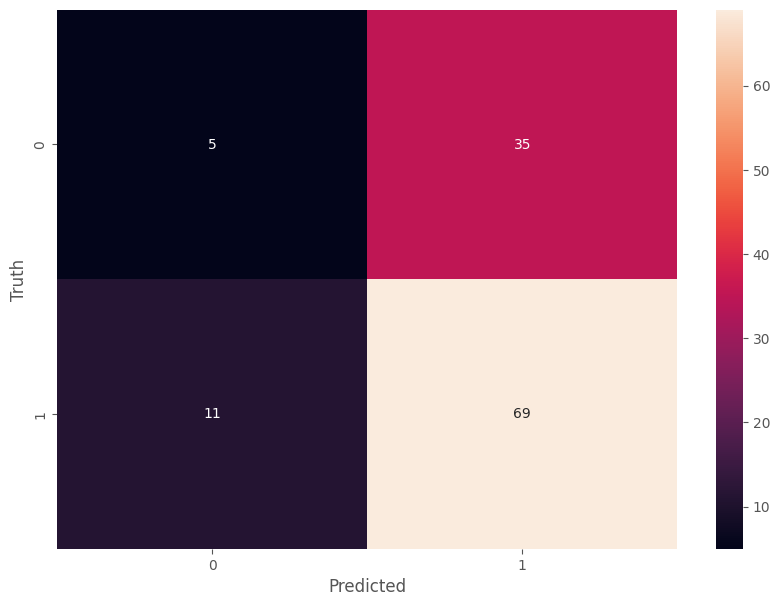

In [19]:
import seaborn as sns
knn = KNeighborsClassifier(n_neighbors=6, weights='distance')
knn.fit(X_train, y_train)
# Importar las bibliotecas necesarias
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()


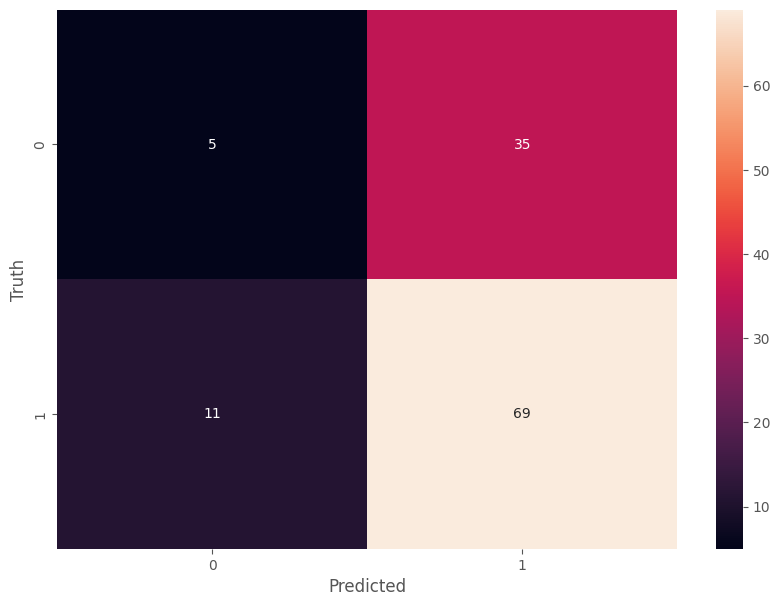

In [18]:
# Predicciones
pred = knn.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, pred)

# Visualización con Seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()